In [1]:
import pandas as pd
import numpy as np
import tqdm
import os

import logging
logging.basicConfig(format='%(asctime)s [%(levelname)s] %(message)s',
                    level=logging.INFO)

import nltk
from nltk import FreqDist

from fuzzywuzzy import fuzz
from bs4 import BeautifulSoup
import lxml
import re

from nltk.corpus import stopwords

In [2]:
root_dir = r"C:\Users\wb570559\github\india_air_pollution\data\processed_data\\"

In [3]:
text_dir = r"C:\Users\wb570559\github\india_air_pollution\data\raw_data\Air Pollution text\Air Pollution text\\"

In [4]:
df_cases = pd.read_csv(root_dir+"case_data_final.csv")

In [5]:
df_cases["case_title"].head()

0    Deputy Commissioner Of Income Tax vs Saraya In...
1    Thankamma Paulose vs The Secretary on 30 July,...
2    K. Srinivasan And Others vs Executive Officer,...
3    Member-Secretary, Andhra ... vs Andhra Pradesh...
4                Soman vs Geologist on 24 August, 2004
Name: case_title, dtype: object

In [6]:
df_cases["mehta"] = df_cases["case_title"].apply(lambda x : 1 if "mehta" in x.lower() else 0)

In [7]:
len(df_cases[df_cases["mehta"]==1])

26

In [8]:
len(df_cases)

1910

In [9]:
df_mehta = df_cases[df_cases["mehta"]==1]

In [10]:
df_mehta["case_title"].head(50)

11      M.C. Mehta vs Union Of India & Ors on 12 Janua...
27         M.C. Mehta vs Kamal Nath & Ors on 12 May, 2000
175     M.C. Mehta vs Union Of India & Ors on 2 April,...
295      M.C.Mehta vs Union Of India & Ors on 8 May, 2009
299     M.C. Mehta vs Union Of India & Others on 22 Se...
307     M. C. Mehta vs Kamal Nath & Ors on 15 March, 2002
315     M.C. Mehta vs Union Of India And Ors on 19 Dec...
365     M.C. Mehta And Anr vs Union Of India & Ors on ...
368     M.C.Mehta vs Union Of India And Ors on 14 Marc...
482     M.C. Mehta vs Union Of India And Ors. On Behal...
490     M.C. Mehta vs Union Of India And Ors on 22 Nov...
589     M.C. Mehta vs Union Of India on 28 February, 2020
607     Sanjay Mehta vs The State Of Jharkhand on 6 Ma...
974     M.C. Mehta vs Union Of India & Ors on 18 March...
1088       J. Mehta vs Union Of India on 24 October, 2013
1104    Sujit Kumar Mehta And Anr vs The State Of Jhar...
1128    Ranjit Mehta And Another vs Regional Officer o...
1140      M.C.

In [11]:
df_titles = pd.DataFrame()

In [12]:
df_titles["case_title"] = df_cases["case_title"]

In [13]:
# Function to remove punctuation
def Punctuation(string):

    # punctuation marks
    punctuations = '''!()-[]{};:'"\,<.>/?@#$%^&*_~0123456789'''

    # traverse the given string and if any punctuation
    # marks occur replace it with null
    string = string.replace("\n", "")
    for x in string.lower():
        if x in punctuations:
            string = string.replace(x, " ")


    string_ = " ".join(string.split())

    string_ = string_.strip()
     

    return string_

In [16]:
df_titles["party_1"] = df_titles["case_title"].apply(lambda x : Punctuation(x.split(" vs ")[0].lower()))
df_titles["party_2"] = df_titles["case_title"].apply(lambda x : Punctuation(x.split(" vs ")[-1].lower().split(" on ")[0]))

In [17]:
df_titles

,case_title,party_1,party_2
0,Deputy Commissioner Of Income Tax vs Saraya In...,deputy commissioner of income tax,saraya industries ltd
1,"Thankamma Paulose vs The Secretary on 30 July,...",thankamma paulose,the secretary
2,"K. Srinivasan And Others vs Executive Officer,...",k srinivasan and others,executive officer cantonment
3,"Member-Secretary, Andhra ... vs Andhra Pradesh...",member secretary andhra,andhra pradesh rayons ltd ors
4,"Soman vs Geologist on 24 August, 2004",soman,geologist
...,...,...,...
1905,Kripakar Mahato Alias Kripakar ... vs The Stat...,kripakar mahato alias kripakar,the state of jharkhand
1906,Kalia Sethi And Another vs State Of Odisha And...,kalia sethi and another,state of odisha and others
1907,M/S. Vishwas Construction ... vs State Of Karn...,m s vishwas construction,state of karnataka
1908,M/S Bhole Baba Griti Udhyog vs Raj State Pollu...,m s bhole baba griti udhyog,raj state pollution control


In [18]:
petitioner_freq = FreqDist(df_titles["party_1"]).most_common()
respondent_freq = FreqDist(df_titles["party_2"]).most_common()

In [19]:
petitioner_freq

[('gujarat', 23),
 ('m c mehta', 17),
 ('delhi pollution control', 7),
 ('gujarat pollution control board', 6),
 ('unknown', 5),
 ('state', 4),
 ('appearance', 4),
 ('madhya pradesh pollution control', 4),
 ('dpcc', 4),
 ('j mehta', 4),
 ('harkishan', 3),
 ('cwp no of', 3),
 ('d', 3),
 ('tileshwar sahu', 3),
 ('u p pollution control board', 3),
 ('patel', 3),
 ('dahyabhai', 3),
 ('haryana state pollution control', 3),
 ('indian council for enviro legal', 3),
 ('maneka gandhi', 3),
 ('bombay suburban khatik', 3),
 ('darshan singh', 3),
 ('mayflower sakthi garden owners', 3),
 ('state pollution control board', 3),
 ('m s baderiya farm', 3),
 ('court on its own motion', 3),
 ('state of himachal pradesh ors', 3),
 ('whether it is to be circulated to', 3),
 ('criminal misc no m of', 3),
 ('wilfred j anr', 3),
 ('mithilesh kumar singh', 3),
 ('m s manjunatha stone crusher', 3),
 ('krishan kant singh anr', 3),
 ('m p pollution control board', 3),
 ('tamil nadu pollution control', 2),
 ('emplo

In [20]:
respondent_freq

[('the state of bihar', 68),
 ('state ors', 54),
 ('the state of jharkhand', 53),
 ('state of karnataka', 43),
 ('the state of bihar ors', 36),
 ('union of india ors', 32),
 ('unknown', 31),
 ('state of kerala', 26),
 ('the karnataka state pollution', 25),
 ('union of india', 22),
 ('raj state pollution control', 21),
 ('state of bihar anr', 21),
 ('karnataka state pollution', 20),
 ('state of u p and others', 19),
 ('the state of madhya pradesh', 19),
 ('state of hp and others', 18),
 ('state of punjab and others', 16),
 ('the', 15),
 ('the state of karnataka', 14),
 ('delhi pollution control', 13),
 ('state of gujarat', 13),
 ('madhya pradesh pollution control', 13),
 ('kerala state pollution control', 12),
 ('union of india uoi and ors', 11),
 ('state of punjab and ors', 11),
 ('the state of jharkhand and anr', 11),
 ('the state of bihar and ors', 10),
 ('the state of jharkhand and ors', 10),
 ('m p pollution control board', 10),
 ('state of punjab ors', 10),
 ('state', 9),
 ('punja

In [29]:

# Importing libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df_petitioner = pd.DataFrame(columns = ["petitioner", "frequency"], data = petitioner_freq)
df_respondent = pd.DataFrame(columns = ["respondent", "frequency"], data = respondent_freq)

In [31]:
df_petitioner_top_15 = df_petitioner[:15]
df_respondent_top_15 = df_respondent[:15]

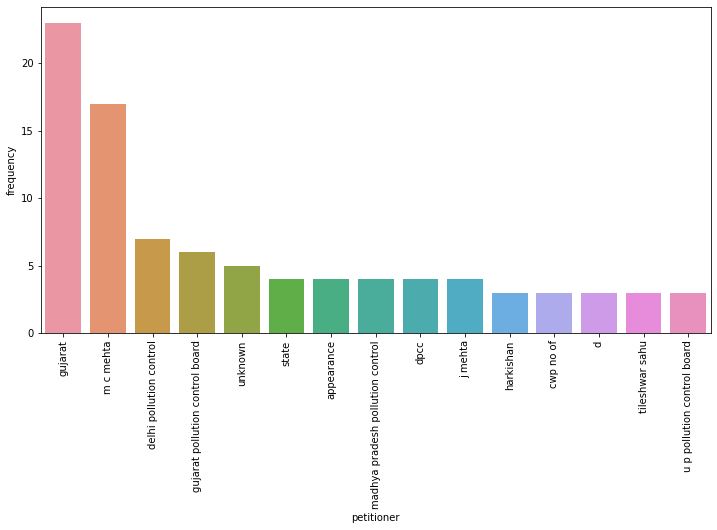

In [38]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.xticks(rotation=90)
sns.barplot(data=df_petitioner_top_15, x="petitioner", y="frequency")
plt.show()

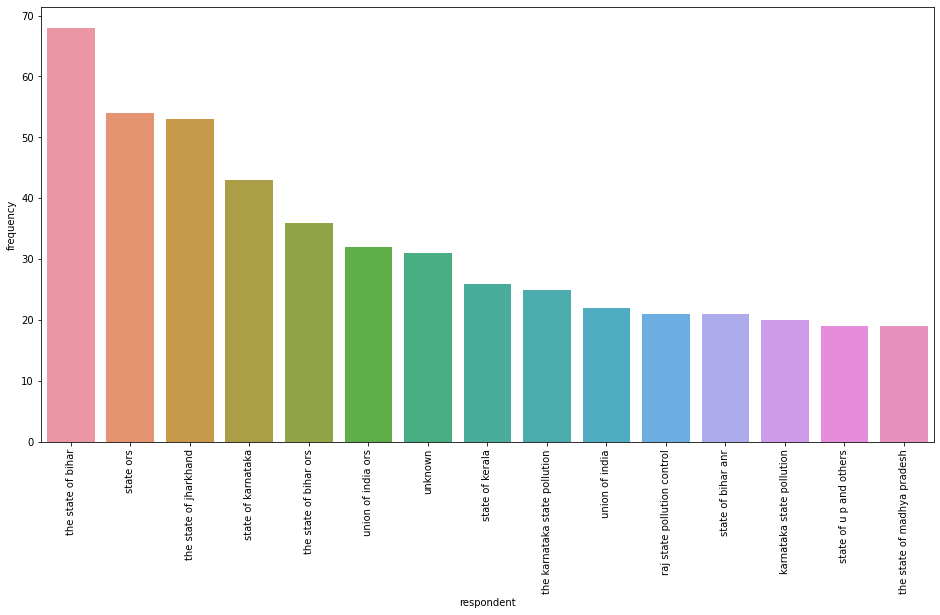

In [37]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.xticks(rotation=90)
sns.barplot(data=df_respondent_top_15, x="respondent", y="frequency")
plt.show()